In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=dfa4a0a335e9ae4638bfb96b47482bc9b20af52fc31b7bdb5b8c2ca3a0374e70
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [16]:
data = './'

train_link = data + 'train.p'

valid_link = data + 'valid.p'

test_link = data + 'test.p'

In [3]:
cd /content/drive/MyDrive/test-20250505T092438Z-1-001/test

/content/drive/MyDrive/test-20250505T092438Z-1-001/test


In [ ]:
import wget

wget.download(link)
!unzip -q traffic-signs-data.zip -d $data

In [17]:
import pickle

with open(train_link , mode = 'rb') as f:
 train = pickle.load(f)
with open(valid_link , mode = 'rb') as f:
 valid = pickle.load(f)
with open(test_link , mode = 'rb') as f:
 test = pickle.load(f)

In [18]:
x_train = train['features']
y_train = train['labels']

x_valid = valid['features']
y_valid = valid['labels']

x_test = test['features']
y_test = test['labels']

x_train.shape , x_valid.shape , x_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [19]:
class_name = {0: 'Speed limit (20km/h)',

 1: 'Speed limit (30km/h)',

 2: 'Speed limit (50km/h)',

 3: 'Speed limit (60km/h)',

 4: 'Speed limit (70km/h)',

 5: 'Speed limit (80km/h)',

 6: 'End of speed limit (80km/h)',

 7: 'Speed limit (100km/h)',

 8: 'Speed limit (120km/h)',

 9: 'No passing',

 10: 'No passing for vehicles over 3.5 metric tons',

 11: 'Right-of-way at the next intersection',

 12: 'Priority road',

 13: 'Yield',

 14: 'Stop',

 15: 'No vehicles',

 16: 'Vehicles over 3.5 metric tons prohibited',

 17: 'No entry',

 18: 'General caution',

 19: 'Dangerous curve to the left',

 20: 'Dangerous curve to the right',

 21: 'Double curve',

 22: 'Bumpy road',

 23: 'Slippery road',

 24: 'Road narrows on the right',

 25: 'Road work',

 26: 'Traffic signals',

 27: 'Pedestrians',

 28: 'Children crossing',

 29: 'Bicycles crossing',

 30: 'Beware of ice/snow',

 31: 'Wild animals crossing',

 32: 'End of all speed and passing limits',

 33: 'Turn right ahead',

 34: 'Turn left ahead',

 35: 'Ahead only',

 36: 'Go straight or right',

 37: 'Go straight or left',

 38: 'Keep right',

 39: 'Keep left',

 40: 'Roundabout mandatory',

 41: 'End of no passing',

 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [20]:
def plot_data (x_data , y_data):
  fig ,ax = plt.subplots(2,4)
  count = 0
  for i in range(0,2):
    for j in range(0,4):
        ax[i,j].imshow(x_data[count])
        ax[i,j].set_xlabel(class_name[y_data[count]] , fontsize = 7)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        count+=1

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

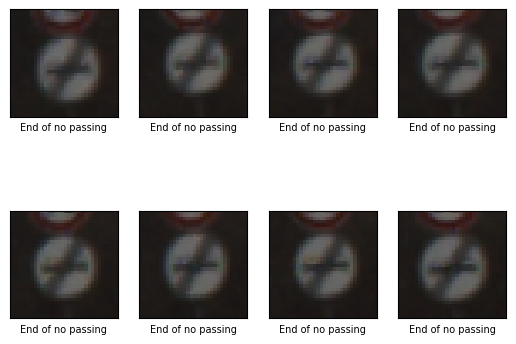

In [21]:
plot_data(x_train,y_train)

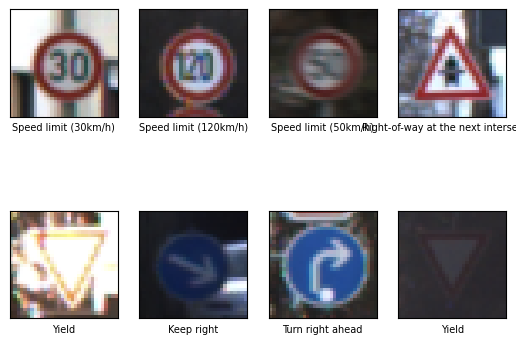

In [22]:
from sklearn.utils import shuffle

x_train,y_train = shuffle(x_train,y_train)
plot_data(x_train,y_train)

In [23]:
x_train = x_train.astype('float32') / 255

x_valid = x_valid.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [24]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train , len(class_name))
y_valid_onehot = to_categorical(y_valid , len(class_name))
y_test_onehot = to_categorical(y_test , len(class_name))

In [25]:
from keras import layers

input_shape = [32,32,3]

model = keras.models.Sequential([
    layers.Conv2D(32,(3,3) , padding = 'same' , input_shape = input_shape),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(43),
    layers.Activation('softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range = 10,
                         zoom_range = 0.1,
                         width_shift_range=0.1,
                         height_shift_range=0.,
                         horizontal_flip = False,
                         fill_mode = 'nearest'
                        )

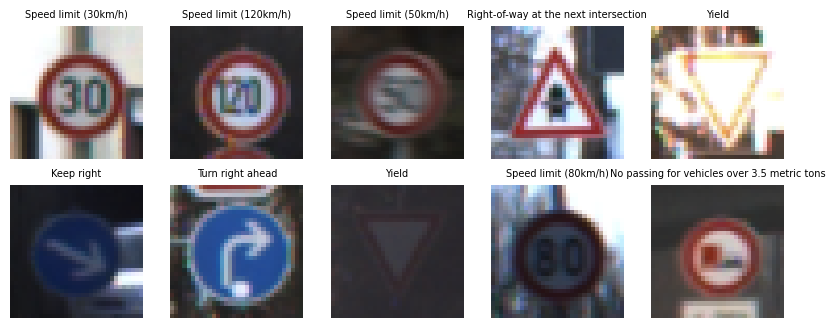

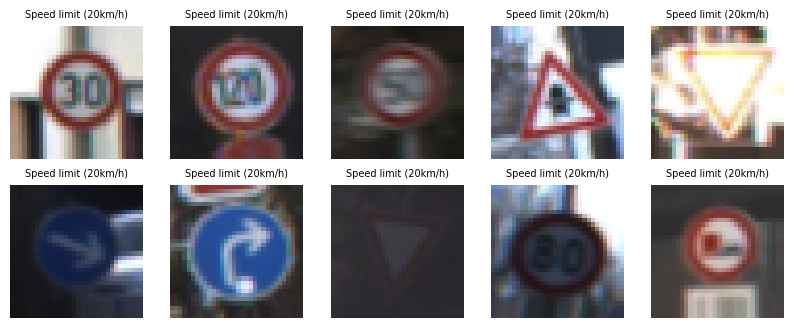

In [33]:
data_x_train = aug.flow(x_train , y_train_onehot , batch_size = 10 , shuffle = False)


plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_name[y_train[i]] , fontsize = 7)
    plt.axis('off')
plt.show()

print('\n')

x_batch, y_batch = next(data_x_train)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(class_name[y_batch[i][0]] , fontsize = 7)
    plt.axis('off')
plt.show()

In [39]:
learning_rate = 0.01

model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
)

In [40]:
batch_size = 64
epochs = 20
factor = 0.2

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = factor, patience = 3, min_lr=1e-6)

history = model.fit(
    aug.flow(x_train, y_train_onehot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_onehot),
    steps_per_epoch=None,
    epochs = epochs,
    callbacks = [early_stopping , reduce_lr]
)

Epoch 1/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 277s 501ms/step - accuracy: 0.9851 - loss: 0.0549 - val_accuracy: 0.9188 - val_loss: 1.2397 - learning_rate: 0.0100
Epoch 2/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 269s 494ms/step - accuracy: 0.9825 - loss: 0.0709 - val_accuracy: 0.9751 - val_loss: 0.1458 - learning_rate: 0.0100
Epoch 3/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 252s 463ms/step - accuracy: 0.9848 - loss: 0.0536 - val_accuracy: 0.9830 - val_loss: 0.1057 - learning_rate: 0.0100
Epoch 4/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 253s 465ms/step - accuracy: 0.9849 - loss: 0.0613 - val_accuracy: 0.9544 - val_loss: 0.3138 - learning_rate: 0.0100
Epoch 5/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 248s 455ms/step - accuracy: 0.9781 - loss: 0.0953 - val_accuracy: 0.9737 - val_loss: 0.1733 - learning_rate: 0.0100
Epoch 6/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 267s 465ms/step - accuracy: 0.9857 - loss: 0.0588 - val_accuracy: 0.9794 - val_loss: 0.1931 - learning_rate: 0.0100
Epoch 7/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 260s 479ms/step - accura

In [41]:
model.save('traffic_sign_cnndd1.keras')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('traffic_sign_cnndd.keras')


In [42]:
# Dự đoán
predictions = model.predict(x_test)

# Lấy nhãn dự đoán
predicted_labels = np.argmax(predictions, axis=1)

# Nếu y_test đã one-hot, chuyển về nhãn
true_labels = np.argmax(y_test_onehot, axis=1)

# Tính độ chính xác
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# In chi tiết precision, recall, f1-score
print(classification_report(true_labels, predicted_labels, target_names=[class_name[i] for i in range(43)]))


395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step
Test Accuracy: 98.05%
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.99      1.00      0.99       720
                              Speed limit (50km/h)       0.99      0.99      0.99       750
                              Speed limit (60km/h)       0.96      0.96      0.96       450
                              Speed limit (70km/h)       1.00      0.99      0.99       660
                              Speed limit (80km/h)       0.95      1.00      0.97       630
                       End of speed limit (80km/h)       0.99      0.91      0.95       150
                             Speed limit (100km/h)       0.99      1.00      0.99       450
                             Speed limit (120km/h)       1.00      0.99      0.99       450
              

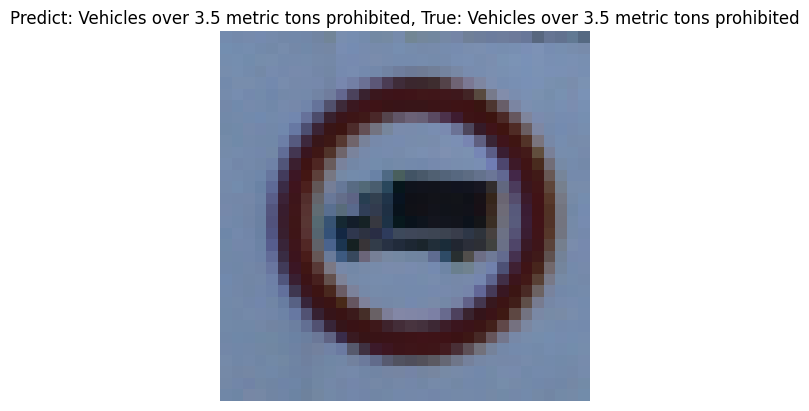

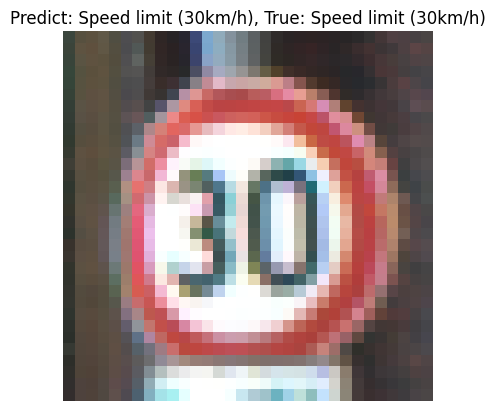

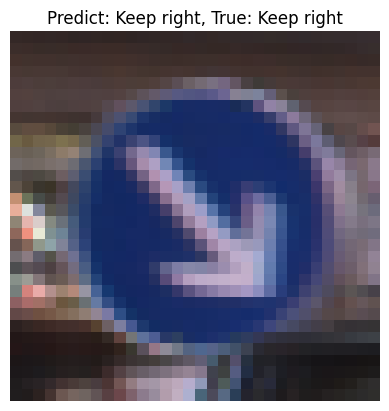

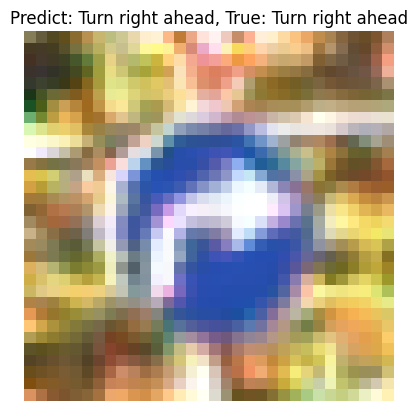

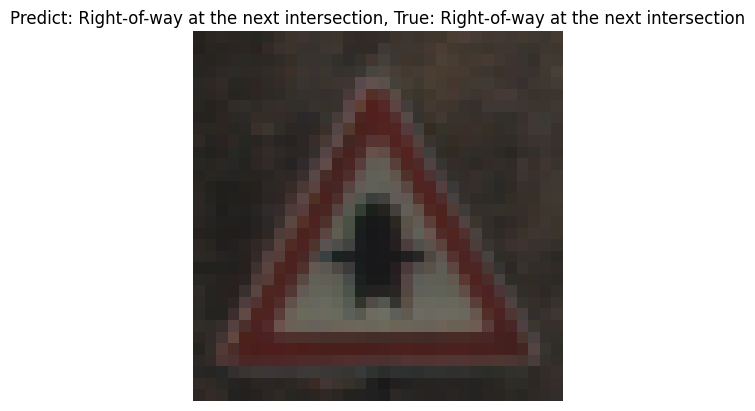

In [43]:
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predict: {class_name[predicted_labels[i]]}, True: {class_name[true_labels[i]]}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Upload ảnh từ máy
uploaded = files.upload()

# Load model đã huấn luyện
model = keras.models.load_model('traffic_sign_cnndd1.keras')

# Dictionary tên lớp
class_name = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution',
    19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians',
    28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only',
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory',
    41: 'End of no passing', 42: 'End of no passing by vehicles over 3.5 metric tons'
}

# Xử lý ảnh và dự đoán
for image_path in uploaded.keys():
    # Load và xử lý ảnh
    img = Image.open(image_path).resize((32, 32))
    img_array = np.array(img).astype('float32') / 255.0
    if img_array.shape[-1] == 4:  # Nếu ảnh RGBA thì bỏ alpha channel
        img_array = img_array[..., :3]
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    label = np.argmax(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.title(f'Dự đoán: {class_name[label]}')
    plt.axis('off')
    plt.show()


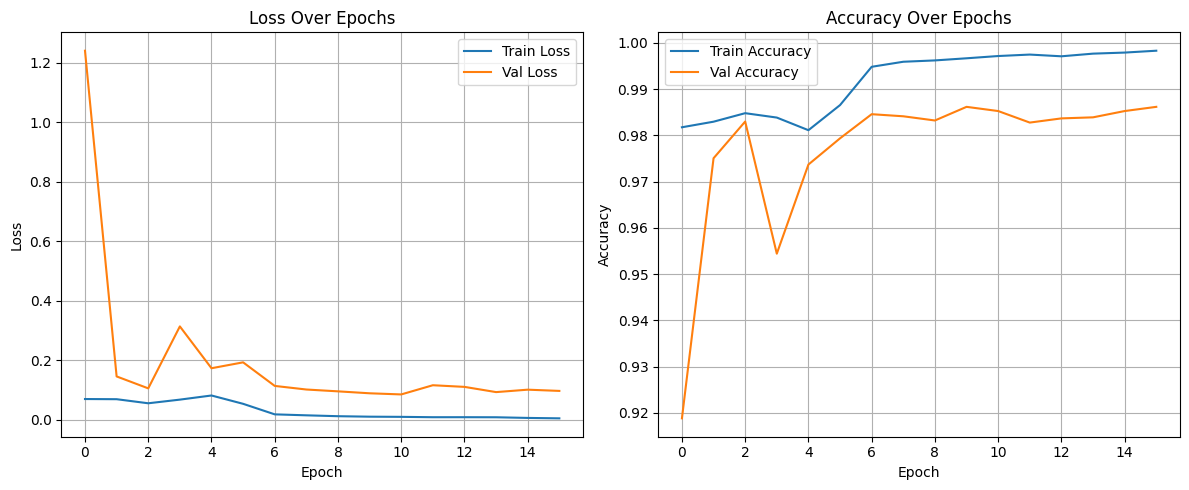

In [44]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Vẽ biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


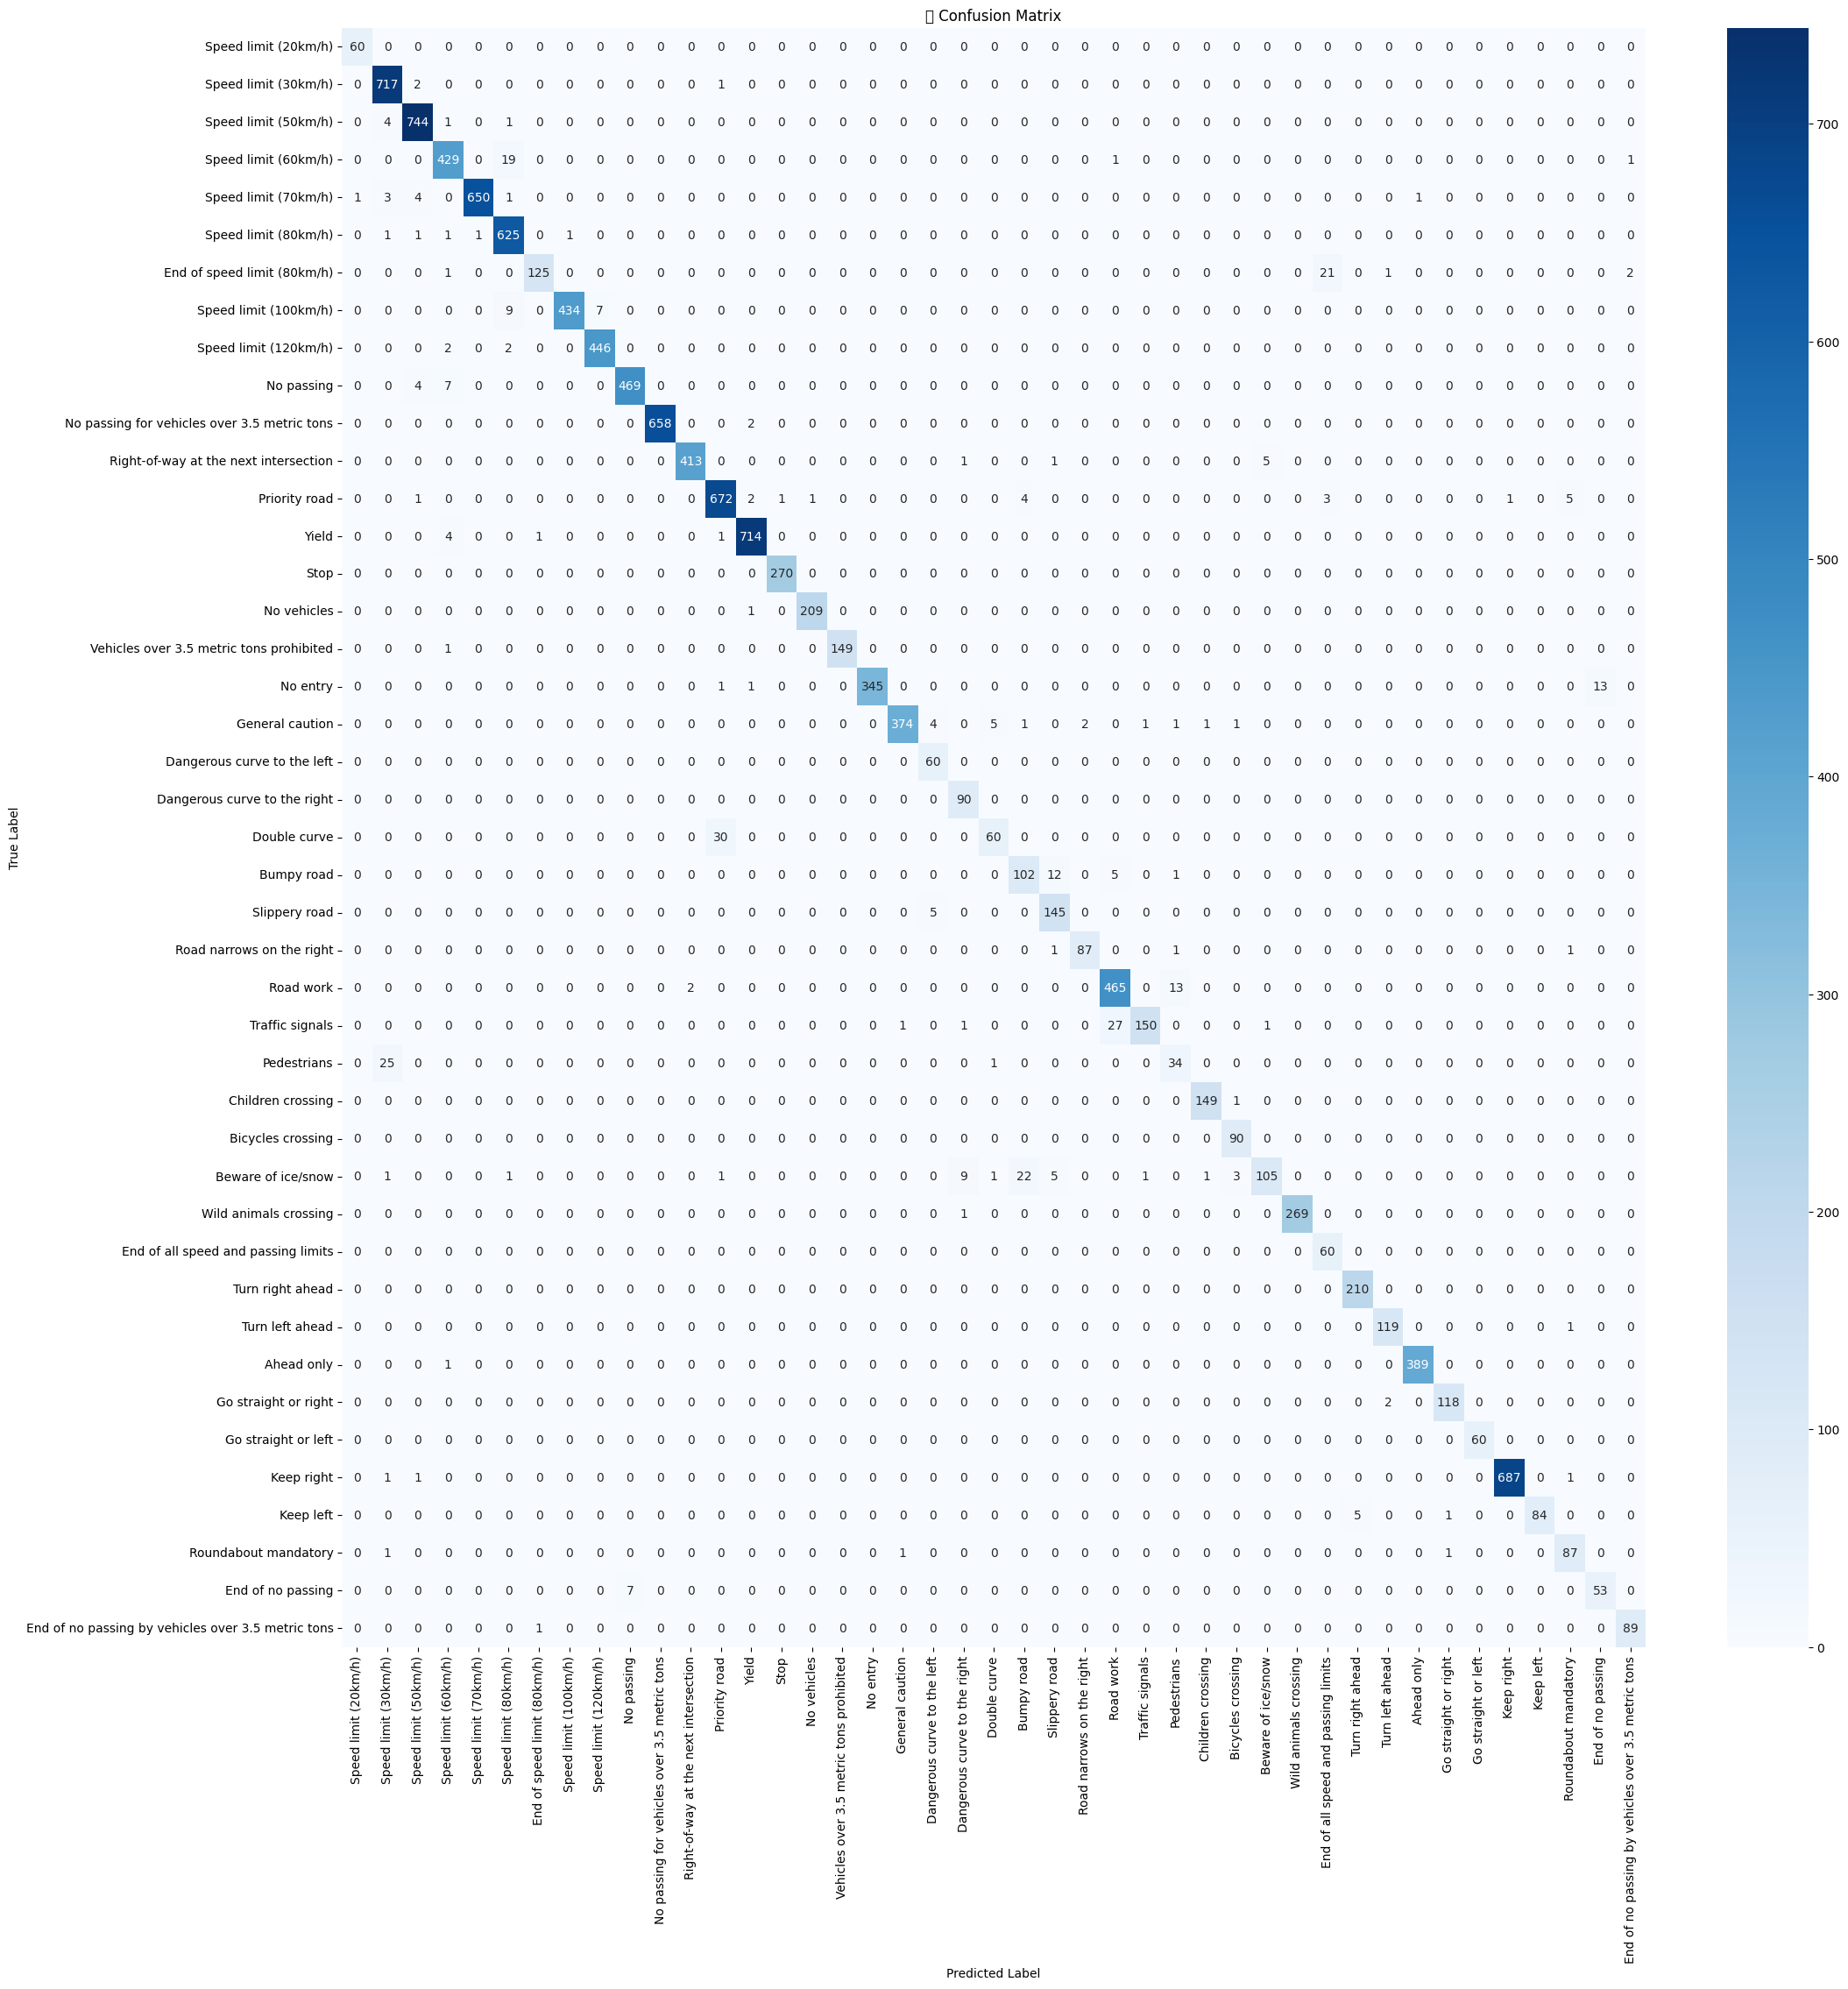

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Load lại mô hình nếu cần
model = keras.models.load_model('traffic_sign_cnndd.keras')

# Dự đoán trên tập test
pred_probs = model.predict(x_test)              # shape = (12630, 43)
pred = np.argmax(pred_probs, axis=1)            # lấy class có xác suất cao nhất
true = np.argmax(y_test_onehot, axis=1)         # nhãn thật

# Tạo confusion matrix
cf = confusion_matrix(true, pred)

# Nếu class_name là dict: đổi thành list theo thứ tự ID
class_names_list = [class_name[i] for i in range(len(class_name))]

# Vẽ confusion matrix
df_cm = pd.DataFrame(cf, index=class_names_list, columns=class_names_list)
plt.figure(figsize=(24, 24))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
